In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
def align_time(*series):#First parameter must be crypto
    min_length = min([data.shape[0] for data in series])
    res = []
    for data in series:
        data = data.reindex(series[0].index, method='nearest')
        res.append(data)
    return [data[:min_length] for data in res]

In [127]:
def data_prep(filename, column):
    df = pd.read_csv(filename, sep=',', header=0, parse_dates=[0]) 
    df['time'] = pd.to_datetime(df['time'])
    index = df.columns.get_loc(column)
    stock_data = df.values
    ret = pd.Series(stock_data[:,index], index=df['time'])
    ret = ret.apply(pd.to_numeric,errors='coerce')
    ret.fillna(method='bfill',inplace=True)
    return ret

In [161]:
headers = ['time', 'close', 'volume', 'low', 'high', 'open']
column = 'close'
btc = data_prep('BTC-USD.csv', column)
goog = data_prep('GOOG.csv', column)
aapl = data_prep('AAPL.csv', column)
ixic = data_prep('^IXIC.csv', column)
gspc = data_prep('^GSPC.csv', column)
dji = data_prep('^DJI.csv', column)
amd = data_prep('AMD.csv', column)
nvda = data_prep('NVDA.csv', column)
tsm = data_prep('TSM.csv', column)
ssnlf = data_prep('SSNLF.csv', column)
gs = data_prep('GS.csv', column)
jpm = data_prep('JPM.csv', column)
bcs = data_prep('BCS.csv', column)
bac = data_prep('BAC.csv', column)
ms = data_prep('MS.csv', column)
db = data_prep('DB.csv', column)
c = data_prep('C.csv', column)
cs = data_prep('CS.csv', column)
ubs = data_prep('UBS.csv', column)
hsbc = data_prep('HSBC.csv', column)

btc, goog, aapl, ixic, gspc, dji, amd, nvda,tsm,ssnlf,gs,jpm,bcs,bac,ms,db,c,cs,ubs,hsbc = align_time(btc, goog, aapl, ixic, gspc, dji, amd,nvda,tsm,ssnlf,gs,jpm,bcs,bac,ms,db,c,cs,ubs,hsbc)
X = pd.concat([goog, aapl, ixic, gspc, dji, amd, nvda,tsm,ssnlf,gs,jpm,bcs,bac,ms,db,c,cs,ubs,hsbc], axis=1)[::-1]
y = btc.rolling(10).mean().fillna(method='bfill')[::-1]

df = pd.DataFrame(X)
#print(df[df.isnull().any(axis=1)])



#df = pd.DataFrame(y)
#print(df[df.isnull().any(axis=1)])
y.fillna(method='bfill', inplace=True)
X.fillna(method='bfill', inplace=True)




In [162]:
from sklearn import linear_model
#lreg = linear_model.LinearRegression()
rreg = linear_model.Ridge(alpha=2e5)
#lareg = linear_model.Lasso()
#lreg.fit(X, y)
rreg.fit(X, y)
#lareg.fit(X, btc)
prediction = pd.Series(rreg.predict(X))



In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

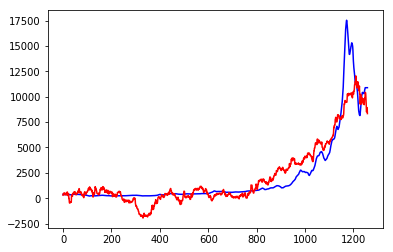

In [164]:
fig = plt.figure()
plt.plot(y.values, 'b-')
plt.plot(prediction, 'r-')
plt.show()